## 💲 Company Market Value Prediction

Given *data about the world's largest companies*, let's try to predict the **market value** of a given company.

We will use a TensorFlow/Keras neural network to make our predictions.

Data source: https://www.kaggle.com/datasets/rishidamarla/largest-2000-companies-in-the-world-by-revenue

### Importing Libraries

In [1]:
!pip install openpyxl -q

In [2]:
import numpy as np
import pandas as pd
import openpyxl

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [3]:
data = pd.read_excel('archive/Largest Companies in the World.xlsx')
data

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.090240,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...
1919,1995,Tractor Supply,4.7,0.3,1.7,7.1,USA,North America,37.090240,-95.712891
1920,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924
1921,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836
1922,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,South America,4.570868,-74.297333


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


### Preprocessing

In [5]:
df = data.copy()

In [6]:
df

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.090240,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...
1919,1995,Tractor Supply,4.7,0.3,1.7,7.1,USA,North America,37.090240,-95.712891
1920,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924
1921,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836
1922,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,South America,4.570868,-74.297333


In [7]:
# Drop unused columns
df = df.drop(['Global Rank', 'Company'], axis=1)

In [8]:
df

,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397
1,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397
2,108.2,21.3,2359.1,191.4,USA,North America,37.090240,-95.712891
3,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891
4,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891
...,...,...,...,...,...,...,...,...
1919,4.7,0.3,1.7,7.1,USA,North America,37.090240,-95.712891
1920,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924
1921,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836
1922,2.4,0.2,14.6,5.8,Colombia,South America,4.570868,-74.297333


In [9]:
df.isna().sum()

Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

In [10]:
# One-hot encode the nominal feature columns
for column in ['Country', 'Continent']:
    dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

In [11]:
df

,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Latitude,Longitude,Country_Australia,Country_Belgium,Country_Bermuda,Country_Brazil,...,Country_USA,Country_United Arab Emirates,Country_Venezuela,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,134.8,37.8,2813.5,237.3,35.861660,104.195397,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,113.1,30.6,2241.0,202.0,35.861660,104.195397,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,108.2,21.3,2359.1,191.4,37.090240,-95.712891,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,147.4,13.6,685.3,243.7,37.090240,-95.712891,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,420.7,44.9,333.8,400.4,37.090240,-95.712891,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,4.7,0.3,1.7,7.1,37.090240,-95.712891,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1920,0.5,0.1,25.7,0.5,36.204824,138.252924,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1921,0.9,0.7,7.8,4.2,1.352083,103.819836,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1922,2.4,0.2,14.6,5.8,4.570868,-74.297333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df.columns

Index(['Sales ($billion)', 'Profits ($billion)', 'Assets ($billion)',
       'Market Value ($billion)', 'Latitude', 'Longitude', 'Country_Australia',
       'Country_Belgium', 'Country_Bermuda', 'Country_Brazil',
       'Country_Canada', 'Country_Channel Islands', 'Country_Chile',
       'Country_China', 'Country_Colombia', 'Country_Czech Republic',
       'Country_Denmark', 'Country_Egypt', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Greece', 'Country_Hong Kong',
       'Country_Hungary', 'Country_India', 'Country_Indonesia',
       'Country_Ireland', 'Country_Israel', 'Country_Italy', 'Country_Japan',
       'Country_Jordan', 'Country_Kazakhstan', 'Country_Kuwait',
       'Country_Lebanon', 'Country_Liberia', 'Country_Luxembourg',
       'Country_Malaysia', 'Country_Mexico', 'Country_Morocco',
       'Country_New Zealand', 'Country_Nigeria', 'Country_Norway',
       'Country_Oman', 'Country_Pakistan', 'Country_Panama', 'Country_Peru',
       'Country_Phili

In [13]:
# Split df into X and y
y = df['Market Value ($billion)']
X = df.drop('Market Value ($billion)', axis=1)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [15]:
X_train.shape, X_test.shape

((1346, 71), (578, 71))

In [16]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [17]:
X_train

,Sales ($billion),Profits ($billion),Assets ($billion),Latitude,Longitude,Country_Australia,Country_Belgium,Country_Bermuda,Country_Brazil,Country_Canada,...,Country_USA,Country_United Arab Emirates,Country_Venezuela,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
900,-0.430684,0.264572,-0.276882,0.056200,0.942677,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,-0.613415,-0.072303,0.0,-0.027267,-0.125893,1.296640,-0.571059,-0.688666,-0.16098,-0.137568
1097,-0.007220,-0.887326,-0.197710,0.626463,-0.160959,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,-0.613415,-0.072303,0.0,-0.027267,-0.125893,-0.771224,1.751133,-0.688666,-0.16098,-0.137568
1639,-0.499878,-0.237537,-0.292357,0.123788,-1.220713,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,1.630217,-0.072303,0.0,-0.027267,-0.125893,-0.771224,-0.571059,1.452083,-0.16098,-0.137568
198,1.038987,0.028285,1.726550,1.129855,-0.222100,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,-0.613415,-0.072303,0.0,-0.027267,-0.125893,-0.771224,1.751133,-0.688666,-0.16098,-0.137568
460,-0.311671,0.205500,-0.182955,1.489972,0.093728,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,-0.613415,-0.072303,0.0,-0.027267,-0.125893,-0.771224,1.751133,-0.688666,-0.16098,-0.137568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.045968,-0.237537,-0.250971,0.626463,-0.160959,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,-0.613415,-0.072303,0.0,-0.027267,-0.125893,-0.771224,1.751133,-0.688666,-0.16098,-0.137568
1791,-0.502645,-0.355681,-0.179716,0.123788,-1.220713,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,1.630217,-0.072303,0.0,-0.027267,-0.125893,-0.771224,-0.571059,1.452083,-0.16098,-0.137568
1096,-0.372561,-0.208002,-0.266086,0.123788,-1.220713,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,1.630217,-0.072303,0.0,-0.027267,-0.125893,-0.771224,-0.571059,1.452083,-0.16098,-0.137568
235,0.679180,0.175964,-0.184754,0.123788,-1.220713,-0.16098,-0.077324,-0.066915,-0.106159,-0.185981,...,1.630217,-0.072303,0.0,-0.027267,-0.125893,-0.771224,-0.571059,1.452083,-0.16098,-0.137568


### Training

In [20]:
inputs = tf.keras.Input(shape=(71, ))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1341.3464 - val_loss: 1012.7303
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 987.3936 - val_loss: 829.7916
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 722.0558 - val_loss: 656.9277
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 502.9749 - val_loss: 491.7090
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 377.8357 - val_loss: 385.2550
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 315.8881 - val_loss: 353.2214
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 289.8635 - val_loss: 321.7078
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 267.4332 - val_loss: 299.8380
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 254.6342 - val_loss: 296.1234
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 246.8264 - val_loss: 268.3154
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 233.8781 - val_loss: 261.7494
Epoch 12/100
34/

### Results

In [21]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [24]:
y_pred = np.squeeze(y_pred)
y_pred

array([ 8.12033615e+01,  1.16833010e+01,  3.47123313e+00,  1.53480310e+01,
        2.19839573e+01,  1.89462223e+01,  2.02216282e+01,  1.89226913e+01,
        8.70877743e+00,  9.07846737e+00,  1.07972727e+01,  2.21916370e+01,
        1.29357920e+01,  9.13560987e-01,  5.67641735e+00,  1.27475672e+01,
        1.54889803e+01,  9.64430332e+00,  1.63373928e+01,  9.25639057e+00,
        1.26032238e+01,  2.27430706e+01,  4.20518303e+01,  1.97681904e+01,
        8.39348984e+00,  8.77363777e+00,  3.00320759e+01,  1.56011925e+01,
        6.16864634e+00,  2.22197127e+00,  1.41023493e+01,  1.18538780e+01,
        7.68932199e+00,  1.16600838e+01,  1.51573467e+00,  1.09386120e+01,
        1.67004070e+01,  8.55440426e+00,  1.33814774e+01,  9.68844318e+00,
        7.81974030e+00,  1.53132505e+01,  4.92932701e+01,  4.06599808e+01,
        1.45979452e+01,  1.20673609e+01,  6.96068287e+00,  1.04683638e+01,
        1.17627459e+01,  1.17641249e+01,  8.84004354e-01,  1.96322613e+01,
        1.24660978e+01,  

In [29]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
rmse

np.float64(17.34470729163572)

In [30]:
y_test.describe()

count    578.000000
mean      19.892042
std       33.329490
min        0.000000
25%        5.100000
50%        9.700000
75%       19.600000
max      268.400000
Name: Market Value ($billion), dtype: float64

In [37]:
np.sum((y_test - y_test.mean())**2)

np.float64(640963.2833910035)

In [38]:
np.sum((y_test - y_pred)**2)

np.float64(173884.86745679734)

In [41]:
r2_score = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2)
r2_score

np.float64(0.7287132165560828)

In [42]:
print("RMSE: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2_score))

RMSE: 17.34
R2 Score: 0.73


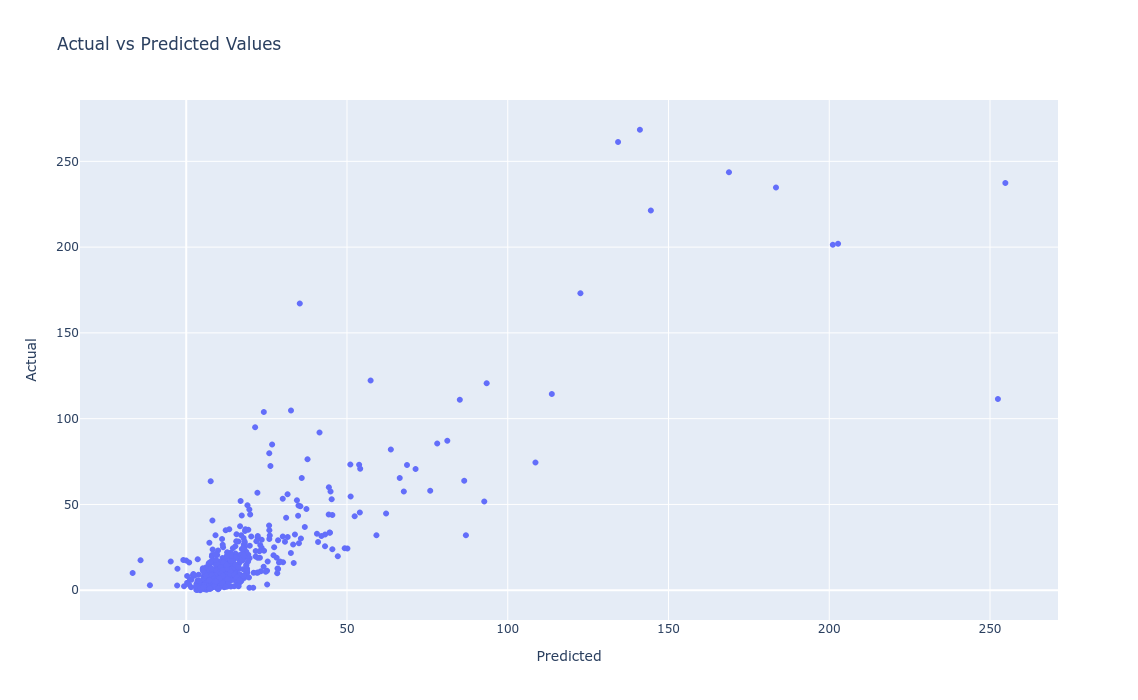

In [43]:
fig = px.scatter(
    x = y_pred,
    y = y_test,
    labels = {'x': "Predicted", 'y': "Actual"},
    title = "Actual vs Predicted Values",
    width = 700,
    height = 700
)

fig.show()